In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os

In [17]:
ref_images = !ls 210226_Bladder_TMA1_reg36/0_edof/*.tif

In [18]:
corrected_images = !ls 210226_Bladder_TMA1_reg36/1_shading_correction/*.tif

In [19]:
ref_file = ref_images[3]
corrected_file = corrected_images[3]
print(ref_file) 
print(corrected_file)

210226_Bladder_TMA1_reg36/0_edof/210226_Bladder_TMA1_reg36_cycle01_channel00_DAPI_4.tif
210226_Bladder_TMA1_reg36/1_shading_correction/210226_Bladder_TMA1_reg36_cycle01_channel00_DAPI_4.tif


In [48]:
ref_img = cv2.imread(ref_file, -1)
corrected_img = cv2.imread(corrected_file, -1)
print(ref_img.shape, corrected_img.shape)

(4096, 4096) (4096, 4096)


In [49]:
ref_img = ref_img[:2048, 2048:]
corrected_img = corrected_img[:2048, 2048:]

In [63]:
# plt.matshow(ref_img, cmap='bone')
# plt.colorbar()
ref_uint = (255*(ref_img / np.max(ref_img))).astype(np.uint8)
cv2.imwrite('figures/shading_1_before.png', ref_uint)

True

In [64]:
# plt.matshow(corrected_img)
# plt.colorbar()
corrected_uint = (255*(corrected_img / np.max(corrected_img))).astype(np.uint8)
cv2.imwrite('figures/shading_2_corrected.png', corrected_uint)

True

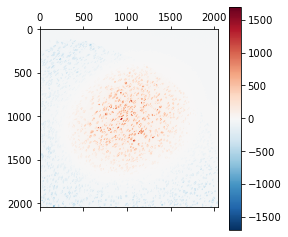

In [56]:
d = ref_img.astype(np.float32) - corrected_img.astype(np.float32)
plt.matshow(d, cmap='RdBu_r', vmin=-d.max(), vmax=d.max())
plt.colorbar()

In [59]:
!mkdir figures